# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [22]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [23]:
print(sinasc_raw.shape)
sinasc_raw.describe(include='all').T

(27028, 69)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ORIGEM,27028.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
CODESTAB,26913.0,NaN,NaN,NaN,3267628.727492,1122677.497349,15318.0,2496534.0,2798484.0,3970442.0,9659366.0
CODMUNNASC,27028.0,NaN,NaN,NaN,111037.796211,18102.751466,110001.0,110011.0,110020.0,110020.0,520870.0
LOCNASC,27028.0,NaN,NaN,NaN,1.011396,0.161679,1.0,1.0,1.0,1.0,4.0
IDADEMAE,27028.0,NaN,NaN,NaN,26.093718,6.387094,11.0,21.0,26.0,31.0,53.0
...,...,...,...,...,...,...,...,...,...,...,...
munResUf,27028,1,Rondônia,27028,NaN,NaN,NaN,NaN,NaN,NaN,NaN
munResLat,27027.0,NaN,NaN,NaN,-10.377988,1.372942,-13.49976,-11.43387,-10.43595,-8.76889,-8.76889
munResLon,27027.0,NaN,NaN,NaN,-62.754987,1.26949,-65.32915,-63.83145,-63.03327,-61.94509,-60.13858
munResAlt,27027.0,NaN,NaN,NaN,179.111999,123.138365,85.0,87.0,153.0,191.0,595.0


In [24]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

# Tarefa 2


### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [86]:
#Crie 2 faixas de Latitude do município (munResLat)

print('Min:',sinasc_raw['munResLat'].min())
print('Max:',sinasc_raw['munResLat'].max())

Min: -13.49976
Max: -8.76889


In [87]:
lat = pd.cut(sinasc_1['munResLat'], [-14, -10.5, -9])
lat.value_counts()

(-14.0, -10.5]    12993
(-10.5, -9.0]      5260
Name: munResLat, dtype: int64

In [89]:
sinasc_raw.groupby(lat)[['QTDPARTNOR', 'QTDPARTCES']].agg(['sum','mean','min','max','median','std','var'])

QTDPARTNOR                                                  \
                      sum      mean  min   max median       std       var   
munResLat                                                                   
(-14.0, -10.5]     5800.0  0.452242  0.0  41.0    0.0  1.123426  1.262087   
(-10.5, -9.0]      2747.0  0.570983  0.0  10.0    0.0  1.086537  1.180563   

               QTDPARTCES                                                  
                      sum      mean  min   max median       std       var  
munResLat                                                                  
(-14.0, -10.5]     7095.0  0.552570  0.0  12.0    0.0  0.753036  0.567062  
(-10.5, -9.0]      2677.0  0.546327  0.0   4.0    0.0  0.737208  0.543475

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [56]:
# Crie 2 faixas da área dos municípios (munResArea)

print('Min:',sinasc_2['munResArea'].min())
print('Max:',sinasc_2['munResArea'].max())

Min: 459.978
Max: 34096.394


In [90]:
area = pd.cut(sinasc_raw['munResArea'], [-460, 3000, 35000])
area.value_counts()

(3000, 35000]    21808
(-460, 3000]      5219
Name: munResArea, dtype: int64

In [98]:
sinasc_raw.groupby(area)[['QTDPARTNOR', 'QTDPARTCES']].agg(['sum','mean','min','max','median','std','var'])

QTDPARTNOR                                                  \
                     sum      mean  min   max median       std       var   
munResArea                                                                 
(-460, 3000]      1912.0  0.371334  0.0  10.0    0.0  0.856441  0.733490   
(3000, 35000]    12659.0  0.632982  0.0  41.0    0.0  1.278932  1.635668   

              QTDPARTCES                                                  
                     sum      mean  min   max median       std       var  
munResArea                                                                
(-460, 3000]      2952.0  0.572981  0.0   5.0    0.0  0.749368  0.561553  
(3000, 35000]    10184.0  0.507070  0.0  12.0    0.0  0.744981  0.554997

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [99]:
# Determine faixas na variável munResAlt 
alt = pd.cut(sinasc_raw['munResAlt'], bins=4)
alt.value_counts()

(84.49, 212.5]    21269
(212.5, 340.0]     3800
(467.5, 595.0]     1590
(340.0, 467.5]      368
Name: munResAlt, dtype: int64

In [97]:
sinasc_raw.groupby(alt)[['QTDPARTNOR', 'QTDPARTCES']].agg(['sum','mean','min','max','median','std','var'])

QTDPARTNOR                                                  \
                      sum      mean  min   max median       std       var   
munResAlt                                                                   
(84.49, 212.5]    12544.0  0.645367  0.0  41.0    0.0  1.254638  1.574116   
(212.5, 340.0]     1367.0  0.363467  0.0  40.0    0.0  1.078334  1.162803   
(340.0, 467.5]      138.0  0.378082  0.0   8.0    0.0  0.916612  0.840178   
(467.5, 595.0]      522.0  0.329338  0.0   9.0    0.0  0.840907  0.707125   

               QTDPARTCES                                                  
                      sum      mean  min   max median       std       var  
munResAlt                                                                  
(84.49, 212.5]     9633.0  0.493342  0.0  12.0    0.0  0.741340  0.549584  
(212.5, 340.0]     2363.0  0.628457  0.0   5.0    0.0  0.758030  0.574609  
(340.0, 467.5]      202.0  0.553425  0.0   3.0    0.0  0.737921  0.544528  
(467.5, 595.0]      938.0  0.591798  0.0   4.0    0.0  0.754152  0.568746

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [155]:
# preparando dataframe filtrado

sinasc_1 = sinasc_raw[['munResNome', 'IDADEMAE', 'DTNASC']]
sinasc_1.groupby('munResNome').sum()
sinasc_1 = sinasc_1.set_index('munResNome')

In [156]:
intermediarias = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Porto Velho",
    "Alto Paraíso": "Porto Velho",
    "Ariquemes": "Porto Velho",
    "Buritis": "Porto Velho",
    "Cacaulândia": "Porto Velho",
    "Campo Novo de Rondônia": "Porto Velho",
    "Cujubim": "Porto Velho",
    "Monte Negro": "Porto Velho",
    "Rio Crespo": "Porto Velho",
    "Jaru": "Porto Velho",
    "Governador Jorge Teixeira": "Porto Velho",
    "Machadinho D'Oeste": "Porto Velho",
    "Theobroma": "Porto Velho",
    "Vale do Anari": "Porto Velho",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Ji-Paraná",
    "Alta Floresta D'Oeste": "Ji-Paraná",
    "Alto Alegre dos Parecis": "Ji-Paraná",
    "Castanheiras": "Ji-Paraná",
    "Espigão D'Oeste": "Ji-Paraná",
    "Ministro Andreazza": "Ji-Paraná",
    "Nova Brasilândia D'Oeste": "Ji-Paraná",
    "Novo Horizonte do Oeste": "Ji-Paraná",
    "Parecis": "Ji-Paraná",
    "Pimenta Bueno": "Ji-Paraná",
    "Primavera de Rondônia": "Ji-Paraná",
    "Rolim de Moura": "Ji-Paraná",
    "Santa Luzia D'Oeste": "Ji-Paraná",
    "São Felipe D'Oeste": "Ji-Paraná",
    "Vilhena": "Ji-Paraná",
    "Cabixi": "Ji-Paraná",
    "Cerejeiras": "Ji-Paraná",
    "Chupinguaia": "Ji-Paraná",
    "Colorado do Oeste": "Ji-Paraná",
    "Corumbiara": "Ji-Paraná",
    "Pimenteiras do Oeste": "Ji-Paraná"
}

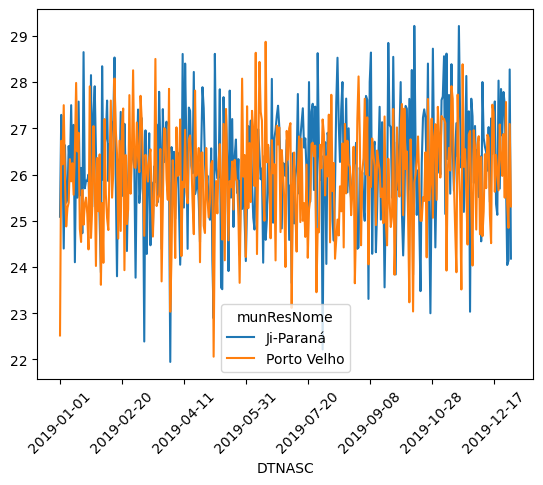

In [159]:
sinasc_1.groupby(['DTNASC', intermediarias])['IDADEMAE'].mean().unstack().plot()
plt.xticks(rotation=45);

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [160]:
map_idh = {
    "Alta Floresta D'Oeste" : 'IDH-médio', 
    'Alto Alegre dos Parecis': 'IDH-baixo',
    'Novo Horizonte do Oeste': 'IDH-médio', 
    'Rolim de Moura': 'IDH-alto', 
    "São Felipe D'Oeste": 'IDH-médio',
    'Ariquemes': 'IDH-alto', 
    'Cujubim': 'IDH-médio', 
    'Alto Paraíso': 'IDH-médio', 
    'Monte Negro': 'IDH-médio', 
    'Jaru': 'IDH-médio',
    'Rio Crespo': 'IDH-médio', 
    'Porto Velho': 'IDH-alto', 
    'Cacaulândia': 'IDH-médio', 
    'Itapuã do Oeste': 'IDH-médio',
    'Ji-Paraná': 'IDH-alto', 
    'Buritis': 'IDH-médio', 
    'Vilhena':'IDH-alto', 
    'Vale do Anari':'IDH-baixo',
    'Candeias do Jamari':'IDH-médio', 
    'Costa Marques':'IDH-médio', 
    'Campo Novo de Rondônia':'IDH-baixo',
    "Machadinho D'Oeste": 'IDH-baixo', 
    'Colorado do Oeste': 'IDH-médio', 
    'Nova Mamoré': 'IDH-baixo', 
    'Urupá': 'IDH-médio',
    'Ouro Preto do Oeste': 'IDH-médio', 
    'Corumbiara':'IDH-médio', 
    'São Miguel do Guaporé':'IDH-médio',
    'Governador Jorge Teixeira': 'IDH-baixo', 
    "Santa Luzia D'Oeste":'IDH-médio',
    'Pimenta Bueno': 'IDH-alto', 
    'Mirante da Serra':'IDH-médio', 
    'Cerejeiras':'IDH-médio',
    'Presidente Médici':'IDH-médio',
    'Cacoal': 'IDH-alto',
    'Parecis':'IDH-médio', 
    "Espigão D'Oeste":'IDH-médio',
    'São Francisco do Guaporé':'IDH-médio', 
    'Ministro Andreazza':'IDH-médio',
    "Nova Brasilândia D'Oeste":'IDH-médio', 
    "Alvorada D'Oeste":'IDH-médio',
    'Primavera de Rondônia':'IDH-médio', 
    'Seringueiras':'IDH-baixo',
    'Município ignorado - RO': None,
    'Castanheiras':'IDH-médio', 
    'Chupinguaia':'IDH-médio', 
    'Guajará-Mirim':'IDH-médio',
    'Theobroma':'IDH-baixo',
    'Nova União':'IDH-baixo', 
    'Teixeirópolis':'IDH-médio', 
    'Vale do Paraíso':'IDH-médio',
    'Pimenteiras do Oeste':'IDH-médio',
    'Cabixi':'IDH-médio'   
    
}

In [162]:
sinasc_idh = sinasc_raw.set_index('munResNome')
sinasc_idh.groupby(map_idh)[['IDADEMAE', 'APGAR5']].agg(['mean','median', 'std'])

IDADEMAE                     APGAR5                 
                 mean median       std      mean median       std
munResNome                                                       
IDH-alto    26.280332   26.0  6.415374  9.171668    9.0  0.758370
IDH-baixo   25.326944   25.0  6.194908  9.172527    9.0  0.860797
IDH-médio   25.884855   25.0  6.353274  9.195668    9.0  0.836771

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [167]:
map_ifdm = {
    "Espigão d'Oeste":'regular',
    'Seringueiras':'regular',
    "Alvorada d'Oeste":'regular',
    'Itapuã do Oeste':'regular',
    'Cabixi':'regular',
    'Novo Horizonte do Oeste':'regular',
    "Nova Brasilândia d'Oeste":'regular',
    'Vale do Paraíso':'regular',
    'Corumbiara':'regular',
    'Alto Paraíso':'regular',
    'Cacaulândia':'regular',
    'Vale do Anari':'regular',
    'Ministro Andreazza':'regular',
    'Costa Marques':'regular',
    'Nova União':'regular',
    'Guajará-Mirim':'regular',
    'Mirante da Serra':'regular',
    'Parecis':'regular',
    'Castanheiras':'regular',
    'Theobroma':'regular',
    "Machadinho d'Oeste":'regular',
    'Campo Novo de Rondônia':'regular',
    'Nova Mamoré':'regular',
    'Cujubim':'regular',
    'Alto Alegre dos Parecis':'regular',
    'Governador Jorge Teixeira': 'regular',
    "Ariquemes": 'moderado',
    "Vilhena": 'moderado',
    "Pimenta Bueno": 'moderado',
    "Porto Velho": 'moderado',
    "Ji-Paraná": 'moderado',
    "Cacoal": 'moderado',
    "Santa Luzia d'Oeste": 'moderado',
    "Rolim de Moura": 'moderado',
    "Chupinguaia": 'moderado',
    "São Miguel do Guaporé": 'moderado',
    "Pimenteiras do Oeste": 'moderado',
    "Teixeirópolis": 'moderado',
    "Colorado do Oeste": 'moderado',
    "Jaru": 'moderado',
    "Rio Crespo": 'moderado',
    "Primavera de Rondônia": 'moderado',
    "Alta Floresta d'Oeste": 'moderado',
    "Ouro Preto do Oeste": 'moderado',
    "São Francisco do Guaporé": 'moderado',
    "Candeias do Jamari": 'moderado',
    "Buritis": 'moderado',
    "São Felipe d'Oeste": 'moderado',
    "Presidente Médici": 'moderado',
    "Cerejeiras": 'moderado',
    "Monte Negro": 'moderado',
    "Urupá": 'moderado',
    
}

In [173]:
sinasc_if = sinasc_raw.set_index('munResNome')
sinasc_if.groupby(map_ifdm)[['IDADEMAE', 'IDADEPAI']].agg(['mean','median', 'std'])

IDADEMAE                    IDADEPAI                 
                 mean median       std       mean median       std
munResNome                                                        
moderado    26.226921   26.0  6.388564  31.145206   30.0  7.741017
regular     25.412005   25.0  6.376854  31.345297   30.0  7.975385

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [169]:
map_pib = {
    "Porto Velho" : 'Acima de 1 bilhão',
    "Ji-Paraná": 'Acima de 1 bilhão',
    "Vilhena": 'Acima de 1 bilhão',
    "Ariquemes": 'Acima de 1 bilhão',
    "Cacoal": 'Acima de 1 bilhão',
    "Jaru": 'Acima de 1 bilhão',
    "Rolim de Moura": 'Acima de 1 bilhão',
    "Pimenta Bueno": 'Acima de 1 bilhão',
    "Guajará-Mirim": 'Acima de 500 milhôes',
    "Ouro Preto do Oeste": 'Acima de 500 milhôes',
    "Buritis": 'Acima de 500 milhôes',
    "Machadinho do Oeste": 'Acima de 500 milhôes',
    "Espigão d'Oeste": 'Acima de 500 milhôes',
    "São Miguel do Guaporé": 'Acima de 500 milhôes',
    "Candeias do Jamari": 'Acima de 500 milhôes',
    "Nova Mamoré": 'Acima de 500 milhôes',
    "Cerejeiras": 'Acima de 500 milhôes',
    "Alta Floresta do Oeste": 'Acima de 300 milhôes',
    "Presidente Médici": 'Acima de 300 milhôes',
    "Cujubim": 'Acima de 300 milhôes',
    "Nova Brasilândia do Oeste": 'Acima de 300 milhôes',
    "Alto Paraíso": 'Acima de 300 milhôes',
    "São Francisco do Guaporé": 'Acima de 300 milhôes',
    "Colorado do Oeste": 'Acima de 300 milhôes',
    "Monte Negro": 'Acima de 200 milhôes',
    "Alto Alegre dos Parecis": 'Acima de 200 milhôes',
    "Campo Novo de Rondônia": 'Acima de 200 milhôes',
    "Alvorada do Oeste": 'Acima de 200 milhôes',
    "Chupinguaia": 'Acima de 100 milhôes',
    "Corumbiara": 'Acima de 100 milhôes',
    "Ministro Andreazza": 'Acima de 100 milhôes',
    "Urupá": 'Acima de 100 milhôes',
    "Costa Marques": 'Acima de 100 milhôes',
    "Seringueiras": 'Acima de 100 milhôes',
    "Mirante da Serra": 'Acima de 100 milhôes',
    "Governador Jorge Teixeira": 'Acima de 100 milhôes',
    "Theobroma": 'Acima de 100 milhôes',
    "Santa Luzia do Oeste": 'Acima de 100 milhôes',
    "Novo Horizonte do Oeste": 'Acima de 100 milhôes',
    "Itapuã do Oeste": 'Acima de 100 milhôes',
    "Vale do Paraíso": 'Acima de 100 milhôes',
    "Cacaulândia": 'Acima de 100 milhôes',
    "Cabixi": 'Acima de 100 milhôes',
    "Vale do Anari": 'Acima de 100 milhôes',
    "Nova União": 'Até 100 milhôes',
    "Parecis": 'Até 100 milhôes',
    "Rio Crespo": 'Até 100 milhôes',
    "Pimenteiras do Oeste": 'Até 100 milhôes',
    "Teixeirópolis": 'Até 100 milhôes',
    "São Felipe do Oeste": 'Até 100 milhôes',
    "Castanheiras": 'Até 100 milhôes',
    "Primavera de Rondônia": 'Até 100 milhôes',
}

In [171]:
sinasc_pib = sinasc_raw.set_index('munResNome')
sinasc_pib.groupby(map_pib)[['IDADEPAI', 'IDADEMAE']].agg(['mean', 'max', 'min'])

IDADEPAI               IDADEMAE        
                           mean   max   min       mean max min
munResNome                                                    
Acima de 1 bilhão     31.108387  70.0  15.0  26.265562  47  12
Acima de 100 milhôes  31.744348  73.0  17.0  25.638424  52  12
Acima de 200 milhôes  30.187500  55.0  16.0  25.146435  41  13
Acima de 300 milhôes  30.819149  64.0  16.0  25.706070  47  11
Acima de 500 milhôes  31.381955  60.0  17.0  25.785927  53  13
Até 100 milhôes       31.626126  67.0  17.0  26.519894  41  14

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

Ao observar o IDH, o APGAR da criança se apresenta bem aproximado para cada faixa de valores.

Vemos que no IFDM, onde a idade dos pais em geral são bem próximas não apresentando diferenças relevantes entre moderado e regular.

Com relação ao PIB, podemos notar que a idade do pai, é maior acima de 100 milhões e a menor em 200 milhões.